# Networks
## Problem 2

In [81]:
import matplotlib
from pylab import *
import networkx as nx

import matplotlib.pyplot as plt

In [82]:
m0 = 5 # number of nodes in initial condition
m = 2  # number of edges per new node
alpha = 0.5

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0
    
def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i)**alpha for i in nds))
    x = 0
    for i in nds:
        x += g.degree(i)**alpha
        if r <= x:
            return i

def update(pref=True):
    global g
    g.count += 1
    if g.count % 1 == 0: # network growth once in every 20 steps
        nds = g.nodes()
        newcomer = max(nds) + 1
        for i in range(m):
            if pref:
                j = pref_select(nds)
            else:
                j = int(uniform(0, len(nds)))
            g.add_edge(newcomer, j)
            # g.nodes.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

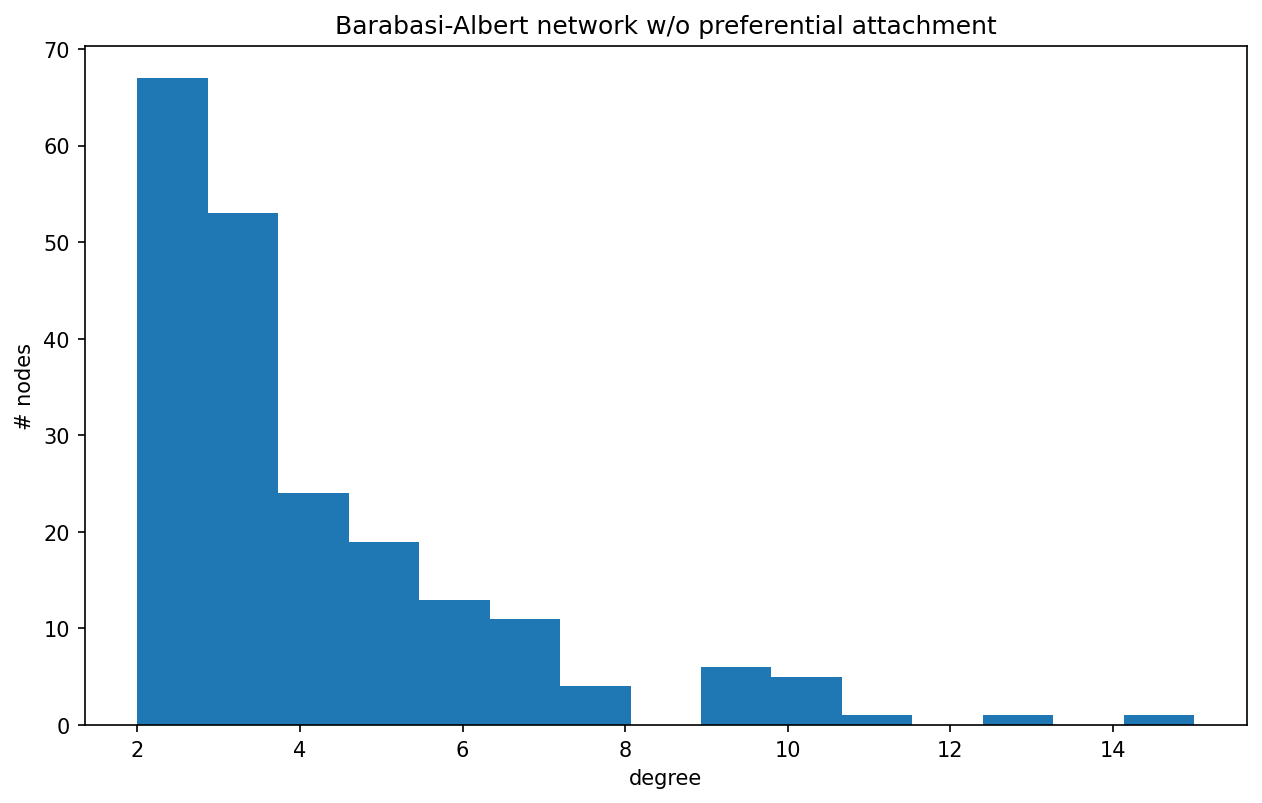

In [83]:
initialize()

for i in range(int(200)):
    update(pref=False)

degrees = []
for node, deg in g.degree:
    degrees.append(deg) 
    
plt.figure(figsize=(10, 6), dpi=150)
plt.hist(degrees, bins=15)
plt.ylabel('# nodes')
plt.xlabel('degree')
plt.title('Barabasi-Albert network w/o preferential attachment')
plt.show()

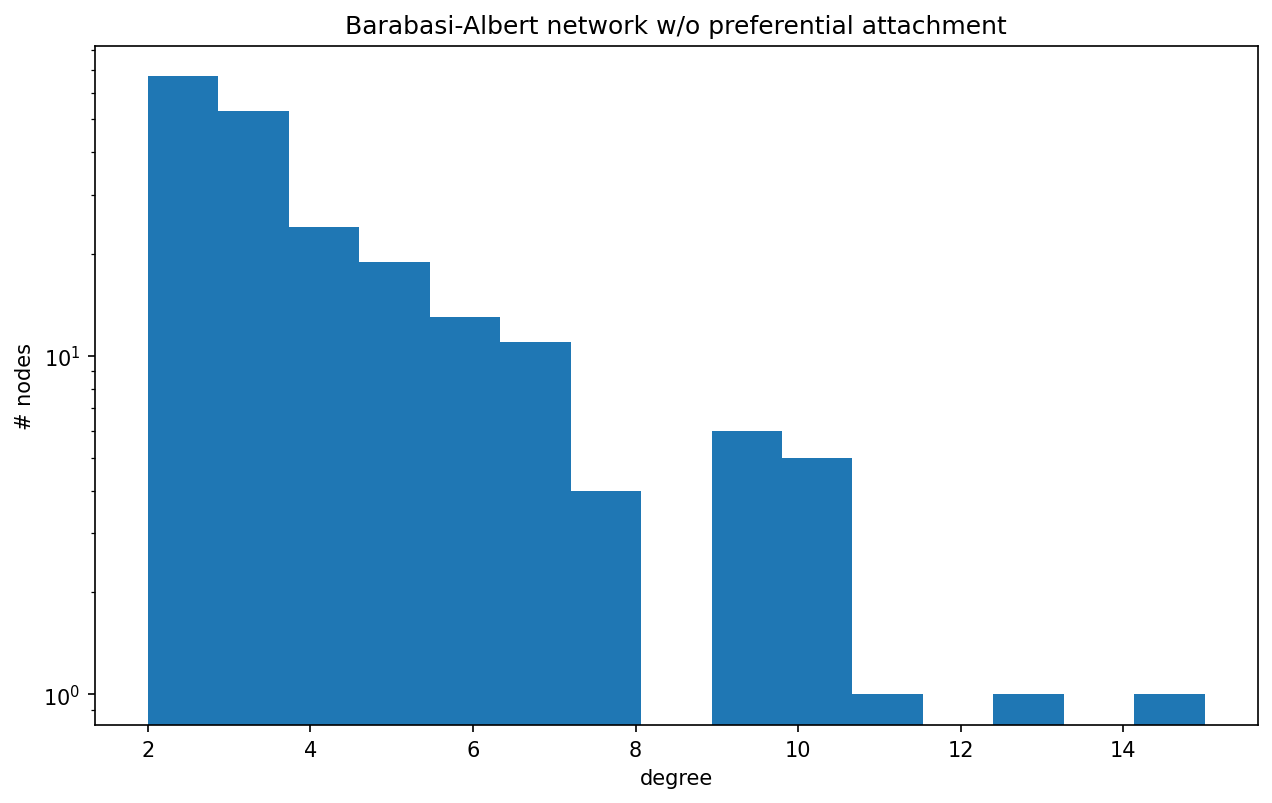

In [84]:
plt.figure(figsize=(10, 6), dpi=150)
plt.hist(degrees, bins=15)
plt.ylabel('# nodes')
plt.xlabel('degree')
plt.title('Barabasi-Albert network w/o preferential attachment')
plt.yscale("log")
plt.show()

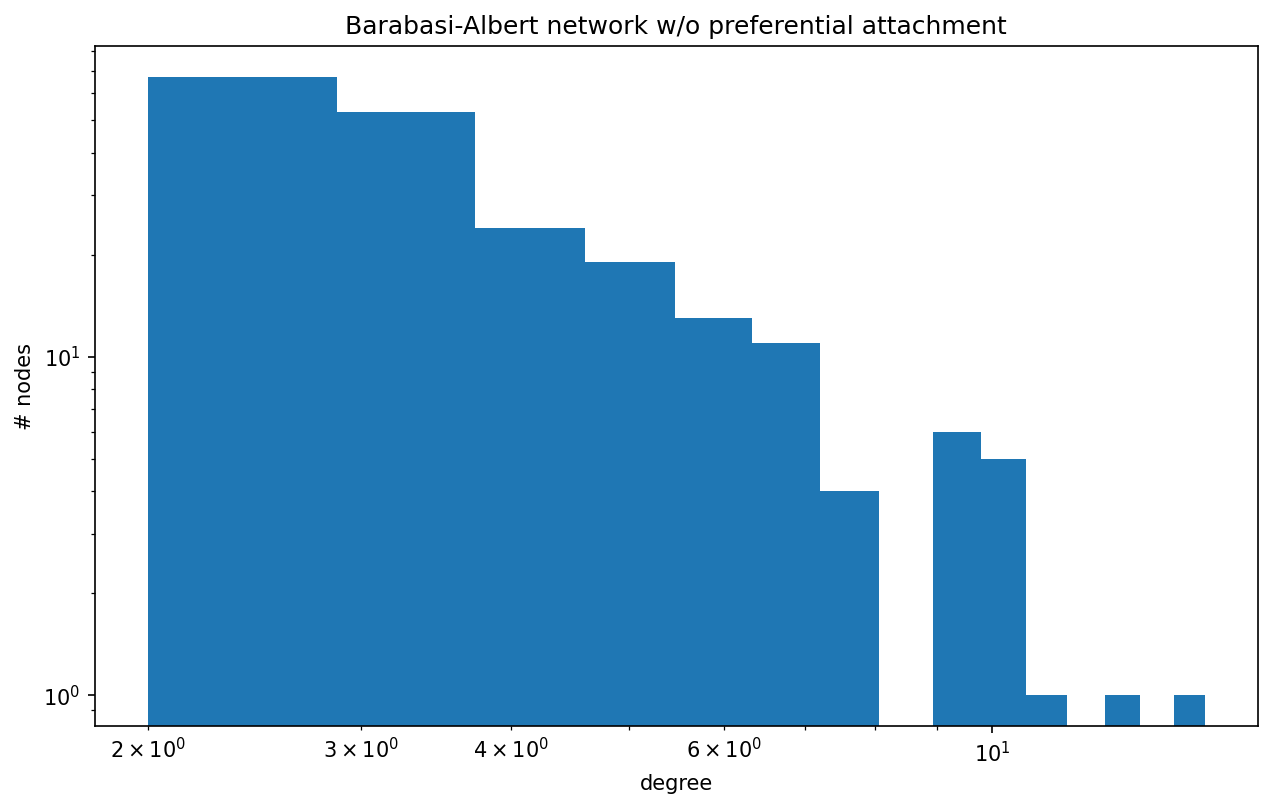

In [85]:
plt.figure(figsize=(10, 6), dpi=150)
plt.hist(degrees, bins=15)
plt.ylabel('# nodes')
plt.xlabel('degree')
plt.title('Barabasi-Albert network w/o preferential attachment')
plt.yscale("log")
plt.xscale("log")
plt.show()

In [86]:
print(mean(degrees))
print(max(degrees))

3.970731707317073
15


/Users/Munchic/.local/share/virtualenvs/Systems_Biology-WMQ5I6fZ/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


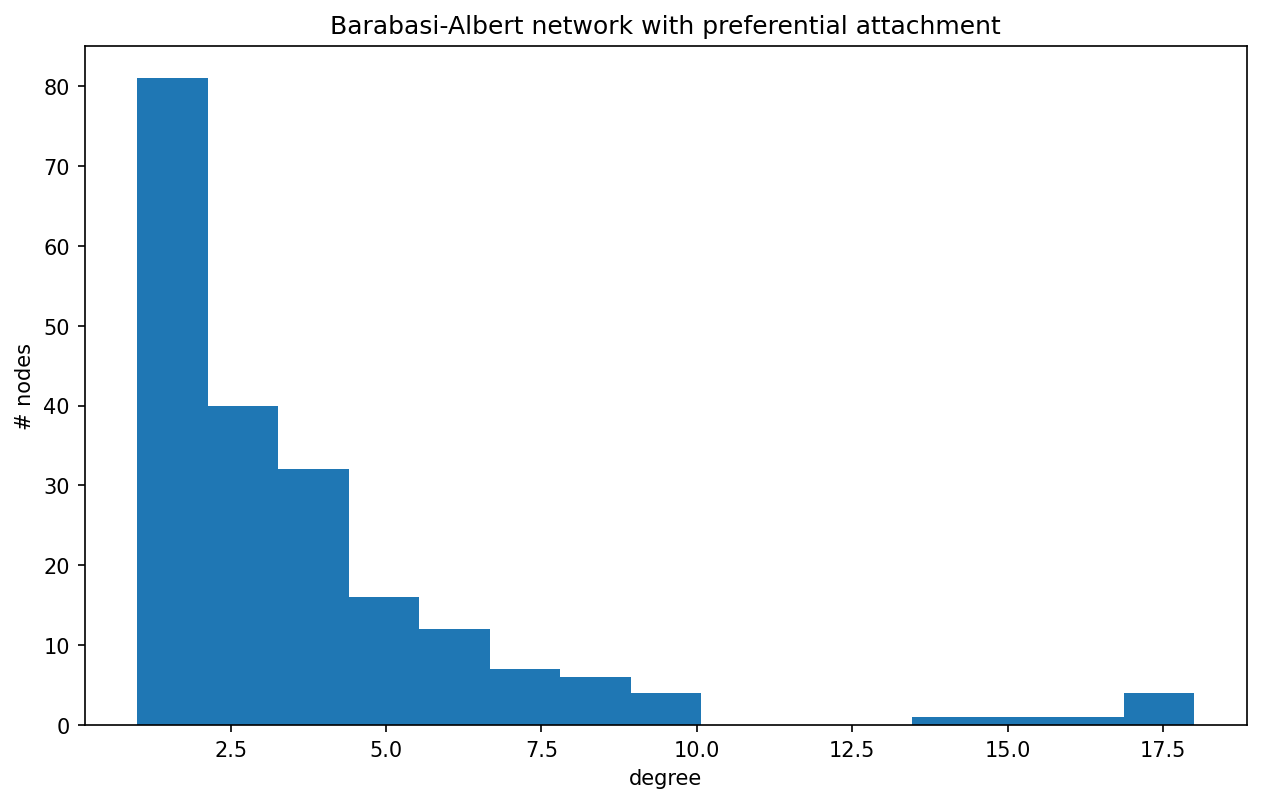

In [87]:
initialize()

for i in range(int(200)):
    update(pref=True)

degrees = []
for node, deg in g.degree:
    degrees.append(deg) 
    
plt.figure(figsize=(10, 6), dpi=150)
plt.hist(degrees, bins=15)
plt.ylabel('# nodes')
plt.xlabel('degree')
plt.title('Barabasi-Albert network with preferential attachment')
plt.show()

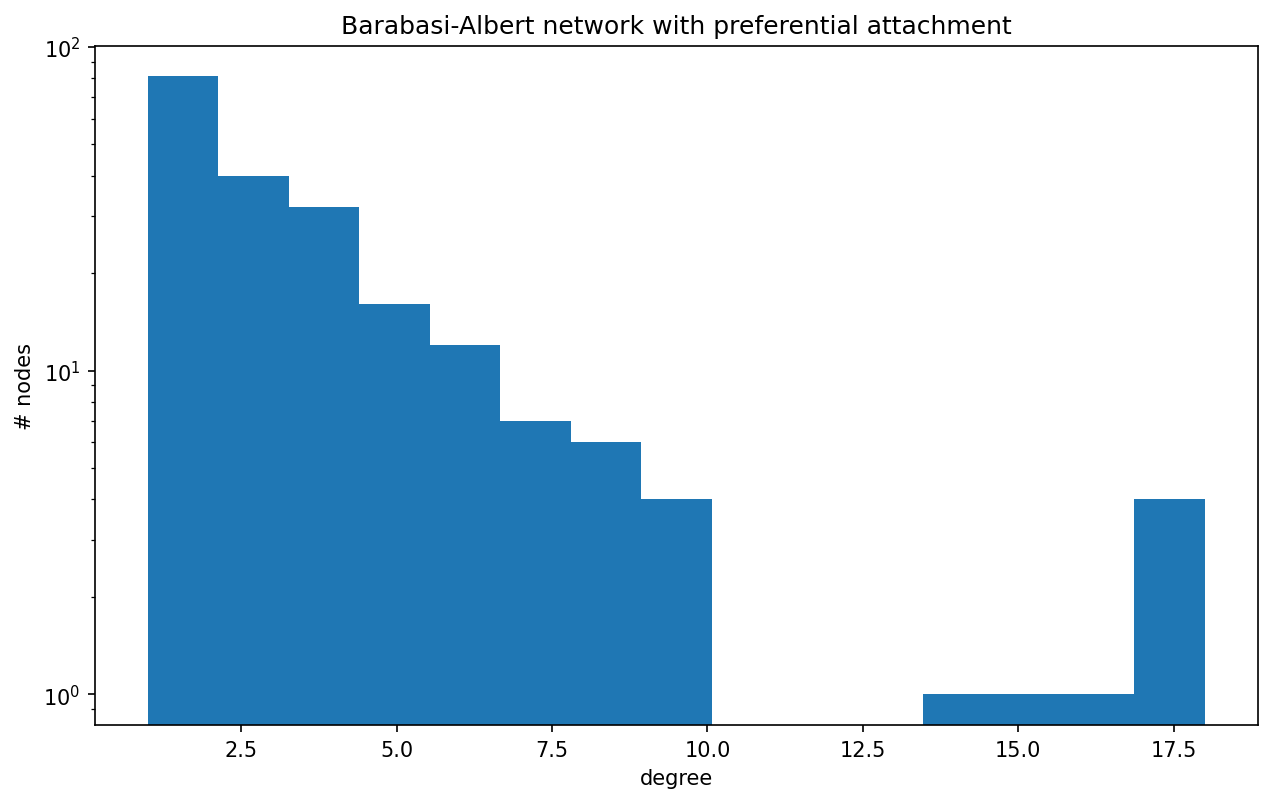

In [88]:
plt.figure(figsize=(10, 6), dpi=150)
plt.hist(degrees, bins=15)
plt.ylabel('# nodes')
plt.xlabel('degree')
plt.title('Barabasi-Albert network with preferential attachment')
plt.yscale("log")
plt.show()

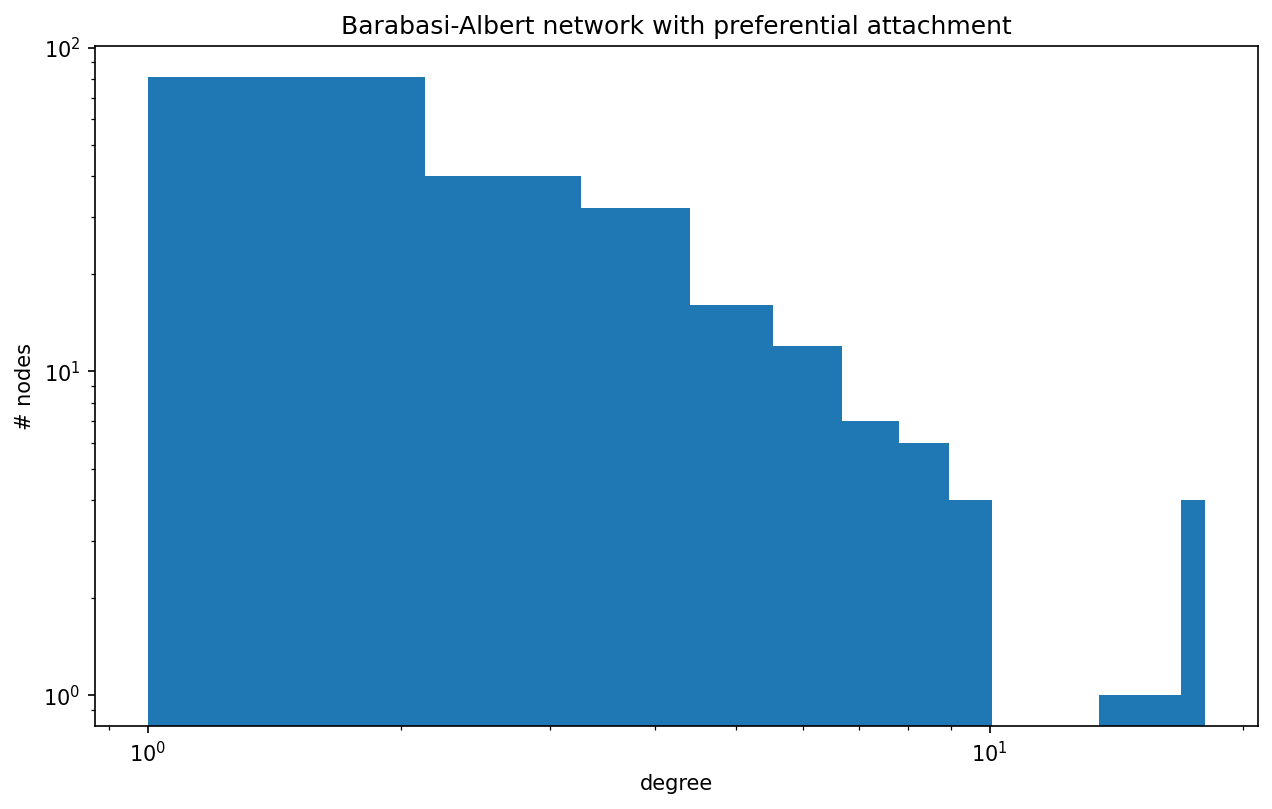

In [89]:
plt.figure(figsize=(10, 6), dpi=150)
plt.hist(degrees, bins=15)c
plt.ylabel('# nodes')
plt.xlabel('degree')
plt.title('Barabasi-Albert network with preferential attachment')
plt.yscale("log")
plt.xscale("log")
plt.show()

In [90]:
print(mean(degrees))
print(max(degrees))

3.9414634146341463
18


In [1]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import copy as cp

In [2]:
nr = 500 # carrying capacity of rabbits
r_init = 100 # initial rabbit population
mr = 0.03 # magnitude of movement of rabbits
dr = 0.9 # death rate of rabbits when it faces foxes
rr = 0.1 # reproduction rate of rabbits
f_init = 30 # initial fox population
mf = 0.1 # magnitude of movement of foxes
df = 0.05 # death rate of foxes when there is no food
rf = 0.7 # reproduction rate of foxes
cd = 0.02 # radius for collision detection
cdsq = cd ** 2

dr_g = 0.2 # death rate of rabbits when there's no grass
rg = 0.9 # regrowth rate of grass
ng = 500 # carrying capacity of grass
g_init = 300 # inital grass "population"
cgsq = 0.05 # radius for grass detection by rabbits

class agent:
    pass

def initialize():
    global agents, rdata, fdata, gdata
    agents = []
    for i in range(r_init + f_init + g_init):
        ag = agent()
        if i < r_init:
            ag.type = 'r'
        elif r_init <= i < r_init + f_init:
            ag.type = 'f'
        else:
            ag.type = 'g'
            
        ag.x = random()
        ag.y = random()
        agents.append(ag)
    rdata = []
    fdata = []
    gdata = []
        
def observe():
    
    global agents, rdata, fdata, gdata
    subplot(2, 1, 1)
    cla()
    
    rabbits = [ag for ag in agents if ag.type == 'r']
    rdata.append(len(rabbits))
    if len(rabbits) > 0:
        x = [ag.x for ag in rabbits]
        y = [ag.y for ag in rabbits]
        plot(x, y, 'b.')
    
    foxes = [ag for ag in agents if ag.type == 'f']
    fdata.append(len(foxes))
    if len(foxes) > 0:
        x = [ag.x for ag in foxes]
        y = [ag.y for ag in foxes]
        plot(x, y, 'ro')
    
    grass = [ag for ag in agents if ag.type == 'g']
    gdata.append(len(grass))
    if len(grass) > 0:
        x = [ag.x for ag in grass]
        y = [ag.y for ag in grass]
        plot(x, y, 'g.')
    
    axis('image')
    axis([0, 1, 0, 1])
    subplot(2, 1, 2)
    cla()
    plot(rdata, label = 'prey')
    plot(fdata, label = 'predator')
    plot(gdata, label = 'grass')
    legend()


def update():
    global agents
    if agents == []:
        return
    ag = agents[randint(len(agents))]
    
    # simulating random movement
    if ag.type != 'g':
        m = mr if ag.type == 'r' else mf
        ag.x += uniform(-m, m)
        ag.y += uniform(-m, m)
        ag.x = 1 if ag.x > 1 else 0 if ag.x < 0 else ag.x
        ag.y = 1 if ag.y > 1 else 0 if ag.y < 0 else ag.y
    
    # detecting collision and simulating death or birth
    foxes = [nb for nb in agents if nb.type == "f"
               and (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < cdsq]
    grasses = [nb for nb in agents if nb.type == "g"
               and (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < cgsq]
    rabbits = [nb for nb in agents if nb.type == "r"
               and (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < cdsq]
    
    if ag.type == 'r':
        if len(foxes) > 0: # if there are foxes nearby
            if random() < dr:
                agents.remove(ag)
                return
        if random() < rr*(1-sum(1 for x in agents if x.type == 'r')/nr):
            agents.append(cp.copy(ag))
        if len(grasses) == 0 and random() < dr_g:
            agents.remove(ag)
    elif ag.type == 'f':
        if len(rabbits) == 0: # if there are no rabbits nearby
            if random() < df:
                agents.remove(ag)
                return
        else: # if there are rabbits nearby
            if random() < rf:
                agents.append(cp.copy(ag))
    else:
        if len(rabbits) > 0:
            agents.remove(ag)
        if random() < rg*(1-sum(1 for x in agents if x.type == 'g')/ng):
            agents.append(cp.copy(ag))

def update_one_unit_time():
    global agents
    t = 0
    while t < 1.:
        t += 1 / len(agents)
        update()
    
import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update_one_unit_time])

/Users/Munchic/.local/share/virtualenvs/Systems_Biology-WMQ5I6fZ/lib/python3.6/site-packages/ipykernel_launcher.py:105: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/Users/Munchic/.local/share/virtualenvs/Systems_Biology-WMQ5I6fZ/lib/python3.6/site-packages/ipykernel_launcher.py:120: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/Users/Munchic/.local/share/virtualenvs/Systems_Biology-WMQ5I6fZ/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by p